In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [19]:
df = pd.read_csv('screentime_analysis.csv')

### Lectura y limpieza de los datos

In [20]:
#1. Fecha: La fecha de los datos registrados.
#2. Aplicación: El nombre de la aplicación móvil.
#3. Uso (minutos): Total de minutos dedicados a utilizar la aplicación en un día determinado.
#4. Notificaciones: Número de notificaciones recibidas de la aplicación.
#5. Veces abierta: Cuántas veces se inició la aplicación.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [4]:
df.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [6]:
df.isnull()

,Date,App,Usage (minutes),Notifications,Times Opened
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [21]:
# Convertir la columna "Date" al tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Crear nuevas columnas para el día, mes y año
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Mostrar el resultado
print(df)

          Date        App  Usage (minutes)  Notifications  Times Opened  Day  \
0   2024-08-07  Instagram               81             24            57    7   
1   2024-08-08  Instagram               90             30            53    8   
2   2024-08-26  Instagram              112             33            17   26   
3   2024-08-22  Instagram               82             11            38   22   
4   2024-08-12  Instagram               59             47            16   12   
..         ...        ...              ...            ...           ...  ...   
195 2024-08-10   LinkedIn               22             12             5   10   
196 2024-08-23   LinkedIn                5              7             1   23   
197 2024-08-18   LinkedIn               19              2             5   18   
198 2024-08-26   LinkedIn               21             14             1   26   
199 2024-08-02   LinkedIn               13              4             1    2   

     Month  Year  
0        8  2024  
1

### No hay datos faltantes ni repetidos incorrectamente

## EDA

### Analizar el tiempo de uso de cada aplicación a lo largo del mes.

### Investigar las relaciones entre las notificaciones y la interacción con la aplicación.

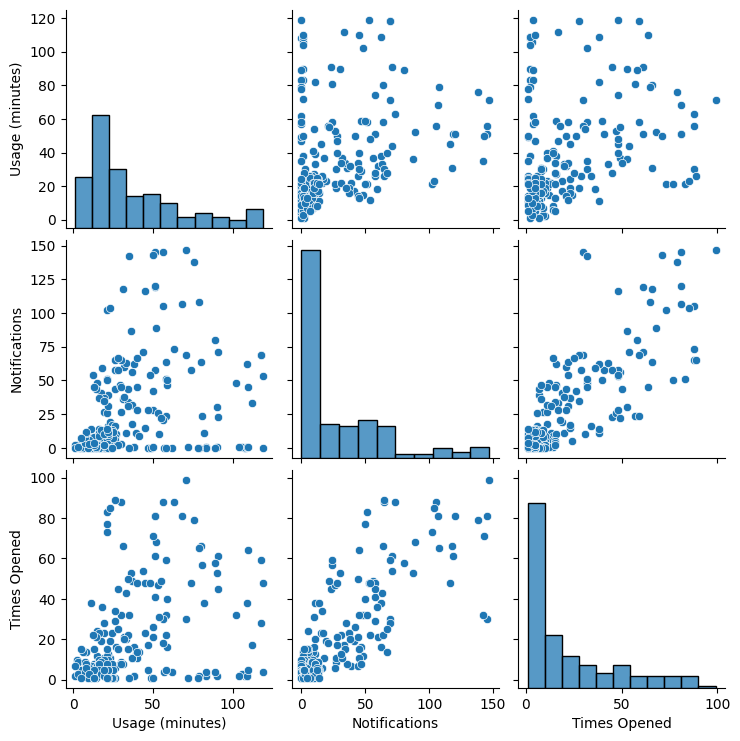

In [6]:
vars1 = [ 'Usage (minutes)', 'Notifications', 'Times Opened']
pair_plot = sns.pairplot(df[vars1].iloc[0:10000])
plt.show()

### Me fijo que esten todos los dias del mes

In [22]:
# Estan todos los dias del mes de Agosto del 2024 (son 30). 
# Los dias se repiten porque las mismas app se abren varias veces en el mismo dia

days = df['Day'].sort_values()

In [23]:
## Hay la misma cantidad de aplicaciones para la columna App

applications = df['App'].value_counts()
print(applications)

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64


### Calulamos los minutos (durante todo Agosto) usado en cada App

           App  Usage (minutes)
2    Instagram             1898
4      Netflix             1819
6     WhatsApp             1204
1     Facebook              842
7            X              675
0  8 Ball Pool              452
3     LinkedIn              390
5       Safari              270


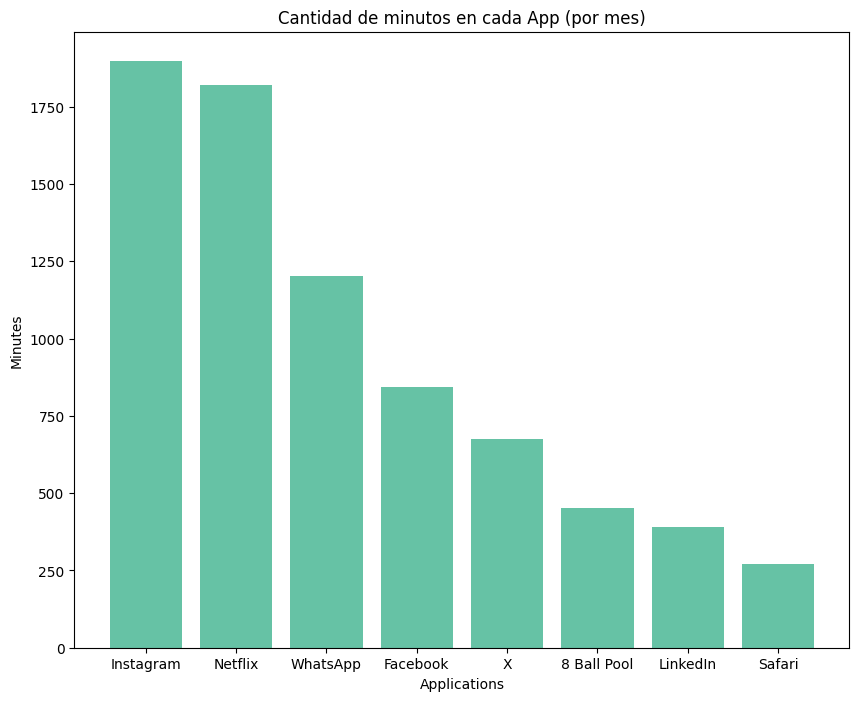

In [24]:
#Calcular los minutos usados en cada app
uso_app = df.groupby('App')['Usage (minutes)'].sum().reset_index()

#Ordenamos de mayor a menor por minutos en cada app
uso_app_ordenado = uso_app.sort_values(by='Usage (minutes)', ascending=False) 


print(uso_app_ordenado)

plt.figure(figsize=(10,8))
plt.bar(uso_app_ordenado['App'], uso_app_ordenado['Usage (minutes)'], color='#66c2a5')
plt.title('Cantidad de minutos en cada App (por mes)')
plt.xlabel('Applications')
plt.ylabel('Minutes')
plt.show()


           App  Usage (minutes)  Usage (hours)
2    Instagram             1898      31.633333
4      Netflix             1819      30.316667
6     WhatsApp             1204      20.066667
1     Facebook              842      14.033333
7            X              675      11.250000
0  8 Ball Pool              452       7.533333
3     LinkedIn              390       6.500000
5       Safari              270       4.500000


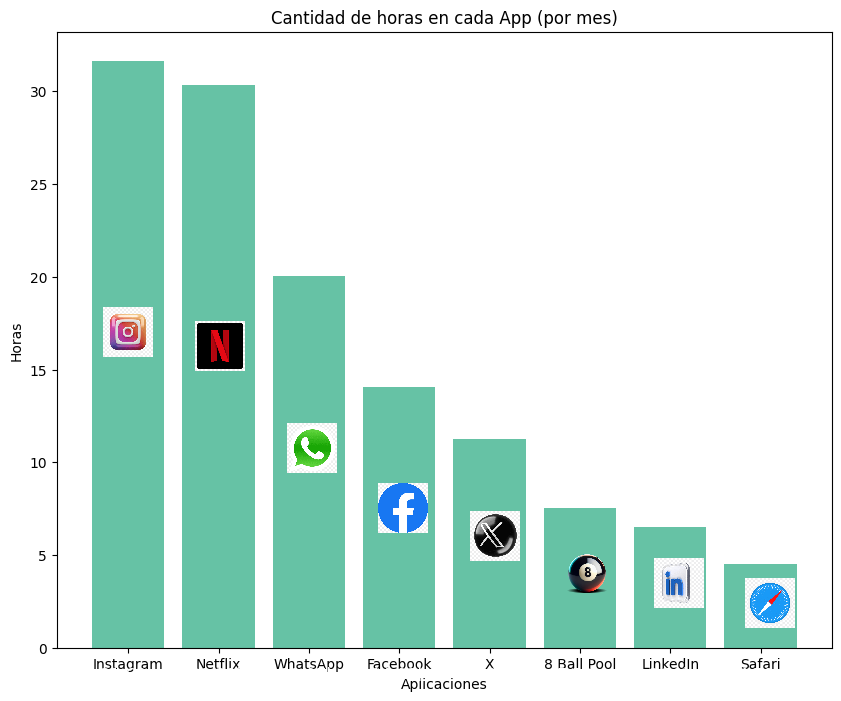

In [25]:
uso_app['Usage (hours)'] = uso_app['Usage (minutes)'] / 60

# Ordenamos de mayor a menor por horas en cada app
uso_app_hours = uso_app.sort_values(by='Usage (hours)', ascending=False)

print(uso_app_hours)

# Crear el gráfico de barras
plt.figure(figsize=(10,8))
bars = plt.bar(uso_app_hours['App'], uso_app_hours['Usage (hours)'], color='#66c2a5')

# Añadir las imágenes (logos) dentro de las barras
for i, bar in enumerate(bars):
    # Cargar el logo correspondiente a cada aplicación
    logo_path = f'logos/{uso_app_hours["App"].iloc[i]}.png'  # Suponiendo que los logos están en la carpeta 'logos'
    img = mpimg.imread(logo_path)
    
    # Definir la posición de la imagen dentro de la barra
    x_position = bar.get_x() + bar.get_width()/2
    y_position = bar.get_height() / 2  # Centrado dentro de la barra (puedes ajustar la posición si lo prefieres)
    
    # Crear la imagen sobre la barra
    imagebox = OffsetImage(img, zoom=0.1)  # Ajusta el zoom según el tamaño del logo
    ab = AnnotationBbox(imagebox, (x_position, y_position), frameon=False, xycoords='data', boxcoords="offset points")
    plt.gca().add_artist(ab)

# Añadir los valores de horas encima de la base de la barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, -1, f'{height:.2f}h', 
             ha='center', va='top', color='white', fontsize=12)

plt.title('Cantidad de horas en cada App (por mes)')
plt.xlabel('Aplicaciones')
plt.ylabel('Horas')
plt.show()

### Agregamos una nueva columna que calcule los minutos usado en cada App, pero por día

In [26]:
# Esta nueva columna se calcula diviendo el total de minutos por la cantidad de dias del mes (30)
uso_app_ordenado['Usage per Day (minute)'] = uso_app_ordenado['Usage (minutes)']/30

# Ordenamos los resultados de manera descendente
uso_app_ordenado = uso_app_ordenado.sort_values(by='Usage per Day (minute)', ascending=False)

# Mostrar el resultado
print(uso_app_ordenado)

           App  Usage (minutes)  Usage per Day (minute)
2    Instagram             1898               63.266667
4      Netflix             1819               60.633333
6     WhatsApp             1204               40.133333
1     Facebook              842               28.066667
7            X              675               22.500000
0  8 Ball Pool              452               15.066667
3     LinkedIn              390               13.000000
5       Safari              270                9.000000


### Dejamos a un lado los minutos por mes, para que quede mas limpio

           App  Usage per Day (minute)
0    Instagram               63.266667
1      Netflix               60.633333
2     WhatsApp               40.133333
3     Facebook               28.066667
4            X               22.500000
5  8 Ball Pool               15.066667
6     LinkedIn               13.000000
7       Safari                9.000000


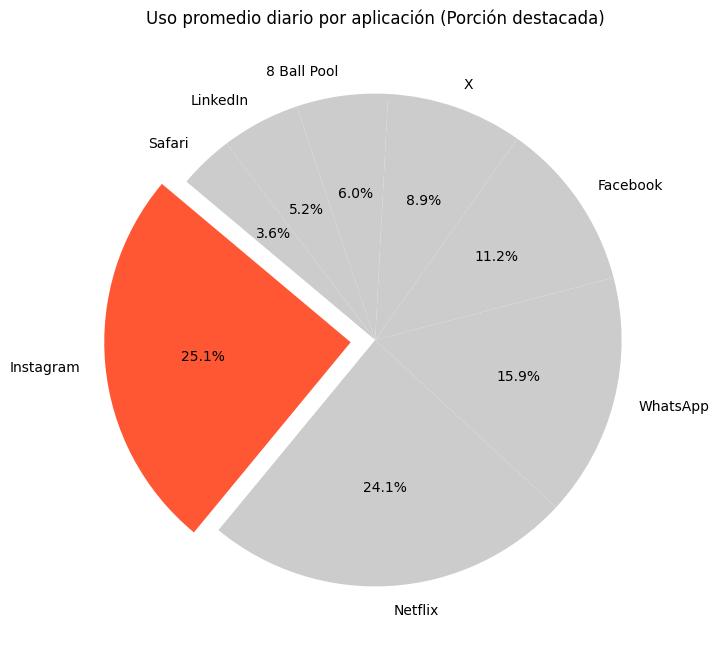

In [27]:
app_for_day = uso_app_ordenado.groupby('App')['Usage per Day (minute)'].sum().reset_index()
app_for_day = app_for_day.sort_values(by='Usage per Day (minute)', ascending=False).reset_index(drop=True)
print(app_for_day)

max_usage_index = app_for_day['Usage per Day (minute)'].idxmax()

# Crear la lista de "explosión" (0 para las demás, valor positivo para la mayor)
explosion = [0.1 if i == max_usage_index else 0 for i in range(len(app_for_day))]

# Ajustar colores para que la porción "salida" sea más notoria
colors = ['#cccccc' if i != max_usage_index else '#ff5733' for i in range(len(app_for_day))]

# Crear el gráfico de pastel con colores ajustados
plt.figure(figsize=(8, 8))
plt.pie(
    app_for_day['Usage per Day (minute)'], 
    labels=app_for_day['App'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explosion, 
    colors=colors
)
plt.title('Uso promedio diario por aplicación (Porción destacada)')
plt.show()

In [39]:
# Convertir los minutos en horas
df['Usage (hours)'] = df['Usage (minutes)'] / 60

# Sumar las horas totales por aplicación
horas_por_app = df.groupby('App')['Usage (hours)'].sum().reset_index()

# Ordenar de mayor a menor
horas_por_app = horas_por_app.sort_values(by='Usage (hours)', ascending=False)

# Mostrar resultado
print(horas_por_app)

# Sumar todas las horas del mes
horas_totales_mes = df['Usage (hours)'].sum()
print(f"Horas totales usadas en agosto: {horas_totales_mes:.2f} horas")


           App  Usage (hours)
2    Instagram      31.633333
4      Netflix      30.316667
6     WhatsApp      20.066667
1     Facebook      14.033333
7            X      11.250000
0  8 Ball Pool       7.533333
3     LinkedIn       6.500000
5       Safari       4.500000
Horas totales usadas en agosto: 125.83 horas


## Empezamos a analizar los datos para relacionar las notificaciones con el uso de las Apps

### Correlacion Univariable: Notificaciones y El tiempo usando las apps 

#### Sutilmente se ve como cuanto mas usamos, mas notificaciones nos llegan, y esto es de esperar
#### Se trata de una correlacion inversa? es decir, visceversa 

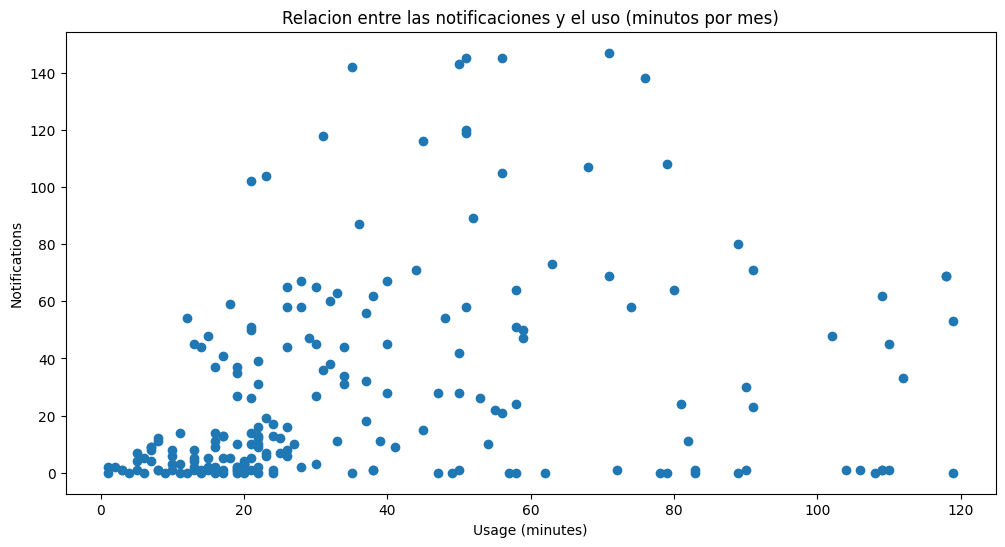

In [98]:
plt.figure(figsize=(12,6))
plt.scatter(df['Usage (minutes)'], df['Notifications'])
plt.title('Relacion entre las notificaciones y el uso (minutos por mes)')
plt.xlabel('Usage (minutes)')
plt.ylabel('Notifications')
plt.show()

### Ahora relacionamos las notificaciones con la cantidad de veces abierta las apps

#### Vemos que existe una correlación bastante notoria: cuanto mas notificaciones se reciben, mas veces se abren las apps

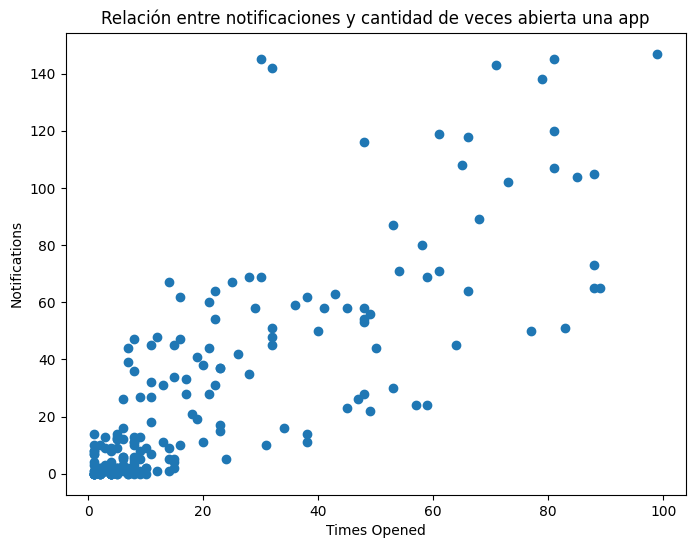

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(df['Times Opened'], df['Notifications'])
plt.title('Relación entre notificaciones y cantidad de veces abierta una app')
plt.xlabel('Times Opened')
plt.ylabel('Notifications')
plt.show()

### Calculamos los minutos en cada app por cada dia de Agosto

In [7]:
# Agrupar por 'Day' y 'App', sumando los minutos de uso
uso_por_dia = df.groupby(['Day', 'App'])['Usage (minutes)'].sum().reset_index()

# Ordenar por día y por mayor uso de minutos en cada día
uso_por_dia_ordenado = uso_por_dia.sort_values(by=['Day', 'Usage (minutes)'], ascending=[True, False])

# Mostrar el resultado
print(uso_por_dia_ordenado)

     Day          App  Usage (minutes)
4      1            X              127
2      1      Netflix              108
0      1  8 Ball Pool               47
1      1     LinkedIn               10
3      1       Safari                8
..   ...          ...              ...
133   30       Safari               71
135   30            X               53
134   30     WhatsApp               31
131   30     Facebook               26
130   30  8 Ball Pool                7

[136 rows x 3 columns]


### Separamos Instagram, ya que es la que mas se usa en todo el mes.

### Calculamos que dia fue mas usado Ig, por minutos

In [17]:
# Filtrar solo la aplicación Instagram
uso_instagram = uso_por_dia_ordenado[uso_por_dia_ordenado['App'] == 'Instagram']

uso_instagram_ordenado = uso_instagram.sort_values(by=['Usage (minutes)'], ascending=[False])

# Mostrar el resultado
print(uso_instagram_ordenado)


     Day        App  Usage (minutes)
109   26  Instagram              281
87    21  Instagram              211
75    18  Instagram              157
31     8  Instagram              123
14     4  Instagram              118
89    22  Instagram              115
59    14  Instagram              110
40    10  Instagram               91
62    15  Instagram               91
81    20  Instagram               89
27     7  Instagram               81
132   30  Instagram               80
117   27  Instagram               71
49    12  Instagram               59
35     9  Instagram               58
122   28  Instagram               50
66    16  Instagram               44
127   29  Instagram               37
104   25  Instagram               32
